In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('50_Startups.csv')
data.head(5)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [6]:
#Correlation Analysis
cor = data.corr()
cor

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

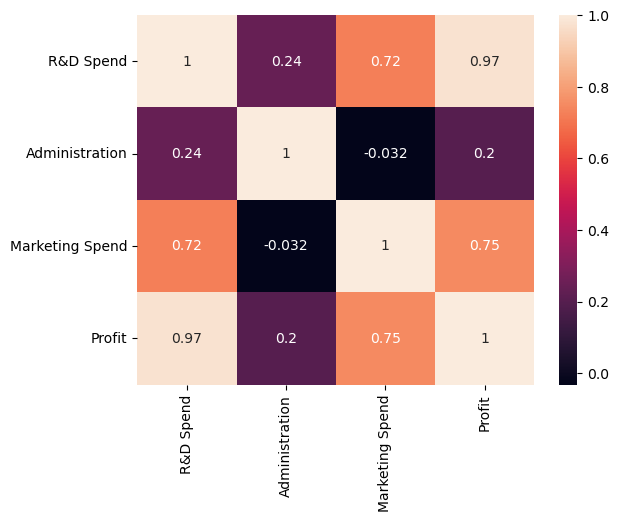

In [7]:
#VISUALISATION
sns.heatmap(cor, annot=True)

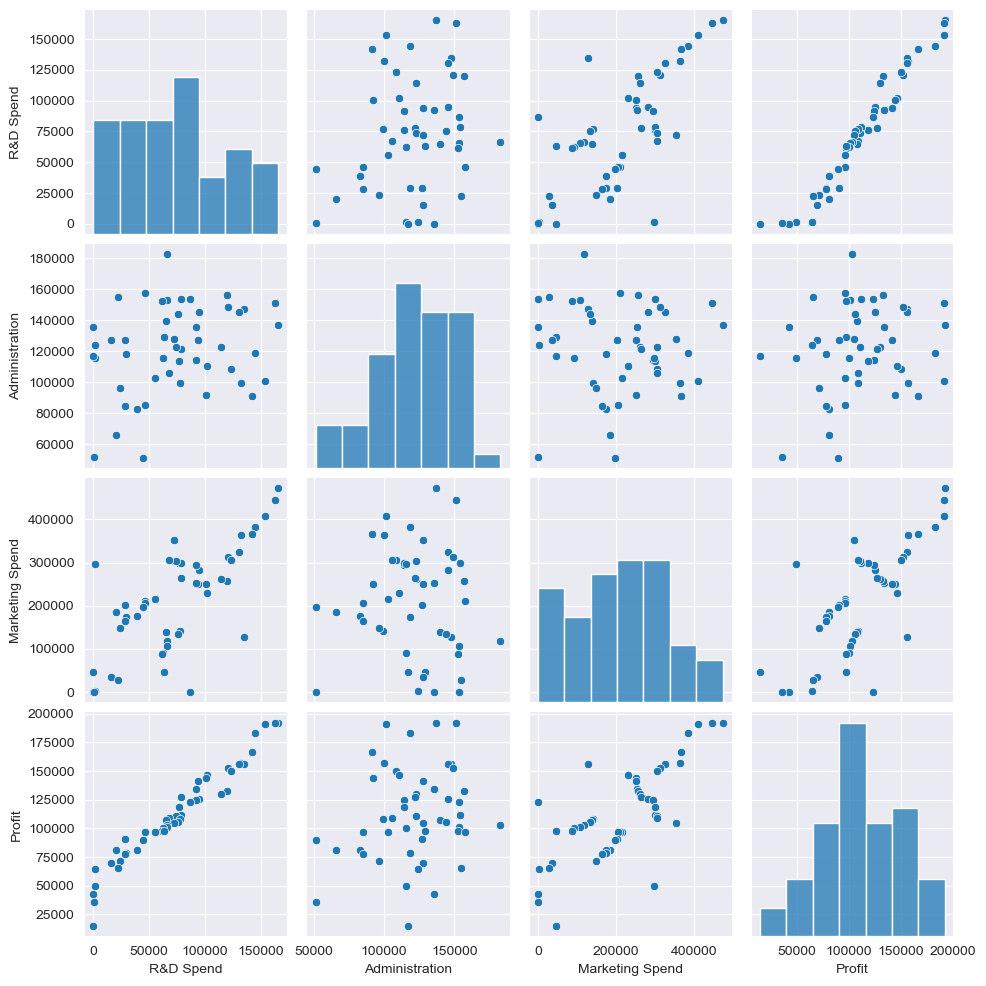

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

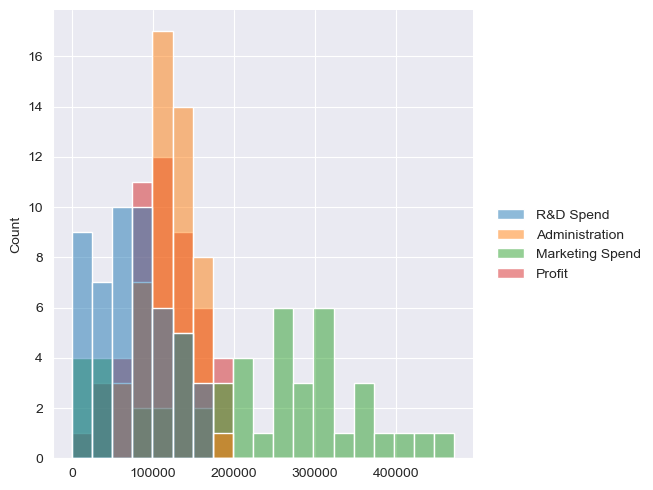

In [9]:
sns.displot(data)

In [10]:
X = data.iloc[:,:-1].values
y = data.iloc[:,3].values

In [11]:
#The data is being split into train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [12]:
#LINEAR REGRESION
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.predict(X_test)
print("Training Score: ",lin_reg.score(X_train,y_train)*100)
print("Testing Score: ",lin_reg.score(X_test, y_test)*100)

Training Score:  94.9957253032403
Testing Score:  93.93955917820571


In [13]:
#RMSE AND CROSS VAL SCORE FOR THE LINEAR REGRESSION MODEL
from sklearn.metrics import mean_squared_error
y_pred_lin = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
from sklearn.model_selection import cross_val_score
scores_lin = cross_val_score(lin_reg, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores_lin)
def display_scores(scores_lin):
  print("Scores:", scores_lin)
  print("Mean:", scores_lin.mean())
  print("Standard deviation:", scores_lin.std())
display_scores(lin_rmse_scores)

8803.775790469343
Scores: [ 7571.76567448  1511.48494076  5652.27017806  5315.20072441
 12935.62577368  4188.84822832  9578.94908815  7987.6029029
  1078.08446274 16091.92217316]
Mean: 7191.175414665964
Standard deviation: 4508.135483290605


In [14]:
#DECISION TREE REGGRESION
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, y_train)
tree_reg.predict(X_test)
print("Training Score: ",tree_reg.score(X_train,y_train)*100)
print("Testing Score: ",tree_reg.score(X_test, y_test)*100)

Training Score:  89.089652193947
Testing Score:  77.18995412718883


In [15]:
#RMSE AND CROSS VAL SCORE FOR THE DECISION TREE REGRESSION MODEL
from sklearn.metrics import mean_squared_error
y_pred_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
print("RMSE: ",tree_rmse)
from sklearn.model_selection import cross_val_score
scores_tree = cross_val_score(tree_reg, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores_tree)
def display_scores(scores_tree):
  print("Scores:", scores_tree)
  print("Mean:", scores_tree.mean())
  print("Standard deviation:", scores_tree.std())
display_scores(tree_rmse_scores)

RMSE:  17079.688493281385
Scores: [  998.99333333 11895.545       9101.72        3430.23
 24862.45        1302.24666667  3430.23        8730.75333333
  8427.5        24862.45      ]
Mean: 9704.211833333333
Standard deviation: 8320.976292073901


In [16]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_reg.predict(X_test)
print("Training Score: ",forest_reg.score(X_train,y_train)*100)
print("Testing Score: ",forest_reg.score(X_test, y_test)*100)

Training Score:  98.94933426043062
Testing Score:  96.36331542195198


In [17]:
#RMSE AND CROSS VAL SCORE FOR THE RANODOM FOREST REGRESSOR REGRESSION MODEL
from sklearn.metrics import mean_squared_error
y_pred_forest = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_rmse = np.sqrt(forest_mse)
print("RMSE: ",forest_rmse)
from sklearn.model_selection import cross_val_score
scores_forest = cross_val_score(forest_reg, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)
def display_scores(scores_forest):
  print("Scores:", scores_forest)
  print("Mean:", scores_forest.mean())
  print("Standard deviation:", scores_forest.std())
display_scores(forest_rmse_scores)

RMSE:  6819.769302014231
Scores: [ 5431.518   8951.4126 10172.3453 16179.8433 37436.1894 11701.6845
 21126.6377  6217.4279   631.1224  4205.7288]
Mean: 12205.39099000001
Standard deviation: 10132.387766952683


In [18]:
#RIDGE REGRESSION
from sklearn import linear_model
rid = linear_model.Ridge(alpha=.5)
rid.fit(X_train,y_train)
rid.predict(X_test)
print("Training Score: ",rid.score(X_train,y_train)*100)
print("Testing Score: ",rid.score(X_test, y_test)*100)


Training Score:  94.9957253032403
Testing Score:  93.93955917799725


In [21]:
#RMSE AND CROSS VAL SCORE FOR THE RIDGE REGRESSION MODEL
from sklearn.metrics import mean_squared_error
y_pred_rid = rid.predict(X_test)
rid_mse = mean_squared_error(y_test, y_pred_rid)
rid_rmse = np.sqrt(rid_mse)
print("RMSE: ",rid_rmse)
from sklearn.model_selection import cross_val_score
scores_rid = cross_val_score(rid, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
rid_rmse_scores = np.sqrt(-scores_rid)
def display_scores(scores_rid):
  print("Scores:", scores_rid)
  print("Mean:", scores_rid.mean())
  print("Standard deviation:", scores_rid.std())
display_scores(rid_rmse_scores)

RMSE:  8803.775790620744
Scores: [ 7571.76567328  1511.48494321  5652.2701803   5315.20072561
 12935.62577613  4188.84823736  9578.9490852   7987.60290115
  1078.08446573 16091.92216979]
Mean: 7191.175415777174
Standard deviation: 4508.13548129794


In [ ]:
"The best model is the Random Forest regression as the score of the model is around 96% which is the best compared to the rest"